In [ ]:
#importing weather data for München
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=München"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    Mun_data = response.json()

    # Convert the data to a DataFrame
    Mun_df = pd.DataFrame.from_dict(Mun_data , orient='index')

    # Reset the index to convert the timestamp to a column
    Mun_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:

# drop unwanted columns

Mun_df = Mun_df.drop(columns = ["index", "time","snow","cityName"])
Mun_df
Mun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43824 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    43654 non-null  float64
 9   coco    43824 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
Mun_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,4.2,3.5,95.0,0.0,260.0,7.6,14.0,1034.0,0.0,5.0
1,4.2,3.3,94.0,0.0,250.0,6.8,13.0,1034.0,0.0,5.0
2,4.0,2.8,92.0,0.0,240.0,8.6,15.0,1034.2,0.0,4.0
3,3.9,2.6,91.0,0.0,240.0,10.4,20.0,1033.2,0.0,4.0
4,4.0,2.7,91.0,0.0,240.0,11.2,21.0,1032.2,0.0,4.0


In [ ]:
#Checking for null values
Mun_df.isnull().sum()

temp      0
dwpt      0
rhum      0
prcp      0
wdir      0
wspd      0
wpgt      0
pres      0
tsun    170
coco      0
dtype: int64

In [ ]:
# find the percentage of missing values in each feature
Mun_df.isnull().sum()/len(Mun_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.387915
coco    0.000000
dtype: float64

In [ ]:
mask_nntsun = Mun_df['tsun'].isnull()
Mun_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
11843,22.1,2.2,27.0,0.0,310.0,7.9,24.1,1016.2,NaN,2.0
11844,22.9,3.9,29.0,0.0,320.0,10.1,25.9,1015.4,NaN,2.0
11845,23.9,4.8,29.0,0.0,300.0,11.2,27.8,1014.7,NaN,2.0
11846,24.4,6.6,32.0,0.0,320.0,12.2,27.8,1013.7,NaN,2.0
13572,24.6,10.5,41.0,0.0,310.0,6.8,18.5,1015.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
31770,26.8,11.0,40.0,0.0,330.0,5.4,13.0,1008.1,NaN,1.0
31771,23.8,11.5,46.0,0.0,360.0,6.8,12.0,1009.0,NaN,1.0
31772,21.5,12.0,53.0,0.0,100.0,5.8,8.0,1009.9,NaN,1.0
31773,20.5,12.3,59.0,0.0,100.0,4.3,7.0,1010.5,NaN,1.0


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  Mun_df[Mun_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun"] )

#Dropping the null values from the dataset
train = Mun_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
Mun_df.loc[Mun_df.tsun.isnull(),"tsun"] = y_pred






In [ ]:
#Check if missing values still exists for the tsun feature
Mun_df.isnull().sum()/len(Mun_df) *100

temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:

Mun_df.isnull().sum()

temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
coco    0
dtype: int64

In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = Mun_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
Mun_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,10.946214,5.163766,70.767319,0.110478,197.073909,9.964481,20.757053,1017.402973,14.319939,4.362655
std,8.052159,6.474547,18.476499,0.668488,94.265964,5.698875,12.175237,8.763578,23.221623,3.081595
min,-11.200000,-15.600000,16.000000,0.000000,0.000000,0.700000,3.000000,979.300000,-3.186356,1.000000
25%,4.600000,0.000000,57.000000,0.000000,100.000000,6.100000,12.000000,1012.400000,0.000000,2.000000
50%,10.600000,5.000000,75.000000,0.000000,230.000000,8.600000,18.000000,1017.400000,0.000000,4.000000
75%,16.800000,10.700000,87.000000,0.000000,270.000000,12.200000,26.000000,1022.500000,26.000000,4.000000
max,36.000000,20.200000,100.000000,37.500000,360.000000,49.000000,119.000000,1047.100000,62.242433,25.000000


In [ ]:
Mun_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,10.946214,5.163766,70.767319,0.110478,197.073909,9.964481,20.757053,1017.402973,14.319939,4.362655
std,8.052159,6.474547,18.476499,0.668488,94.265964,5.698875,12.175237,8.763578,23.221623,3.081595
min,-11.200000,-15.600000,16.000000,0.000000,0.000000,0.700000,3.000000,979.300000,-3.186356,1.000000
25%,4.600000,0.000000,57.000000,0.000000,100.000000,6.100000,12.000000,1012.400000,0.000000,2.000000
50%,10.600000,5.000000,75.000000,0.000000,230.000000,8.600000,18.000000,1017.400000,0.000000,4.000000
75%,16.800000,10.700000,87.000000,0.000000,270.000000,12.200000,26.000000,1022.500000,26.000000,4.000000
max,36.000000,20.200000,100.000000,37.500000,360.000000,49.000000,119.000000,1047.100000,62.242433,25.000000


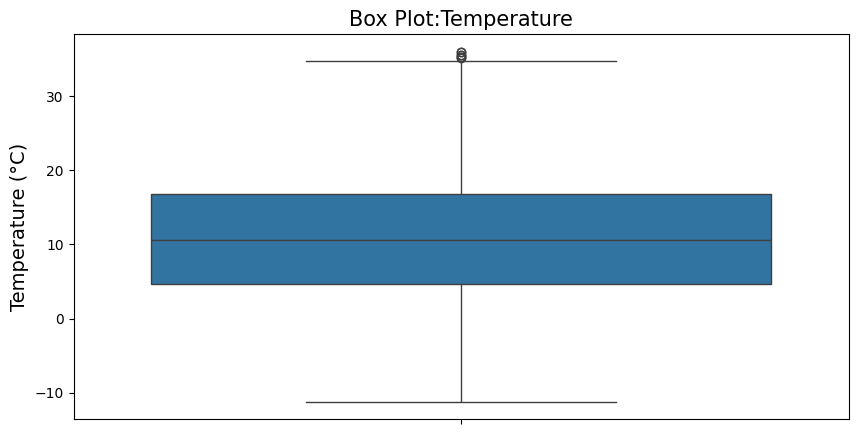

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

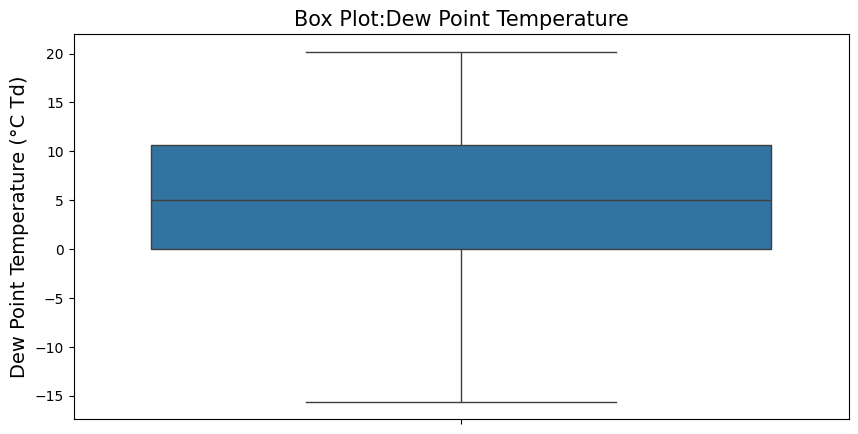

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

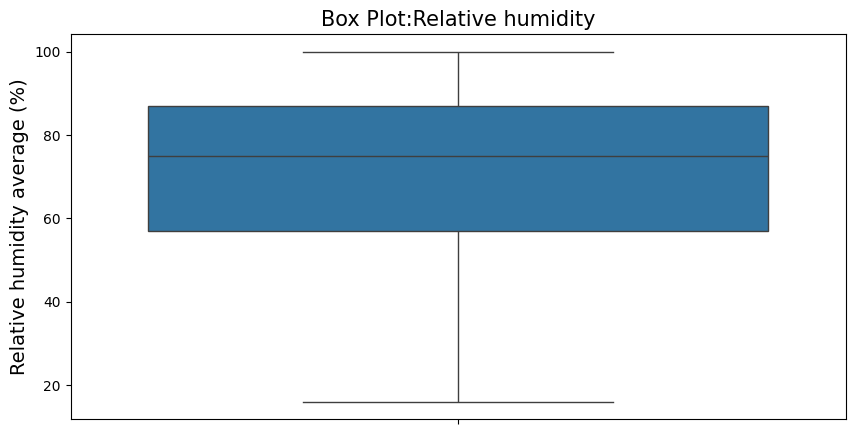

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

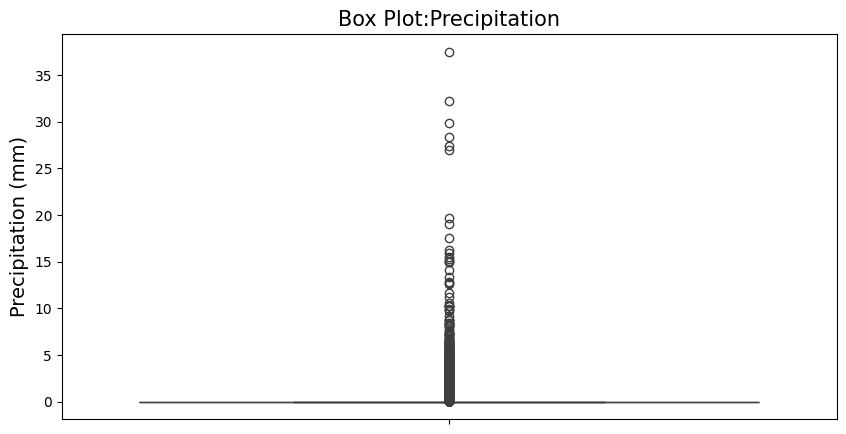

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

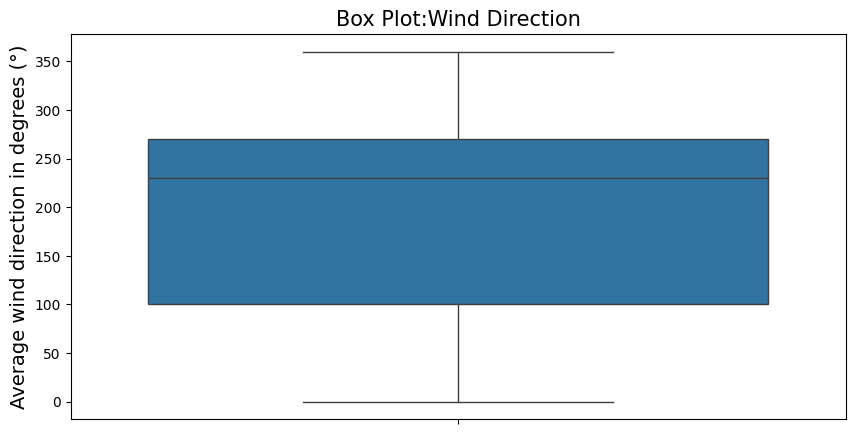

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

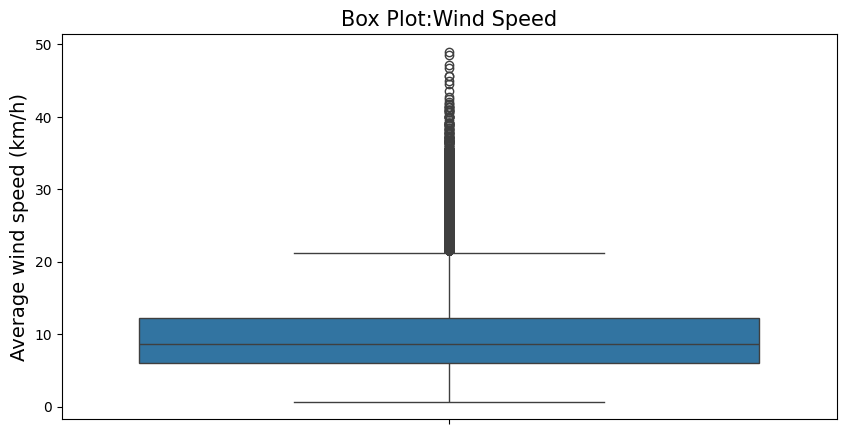

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

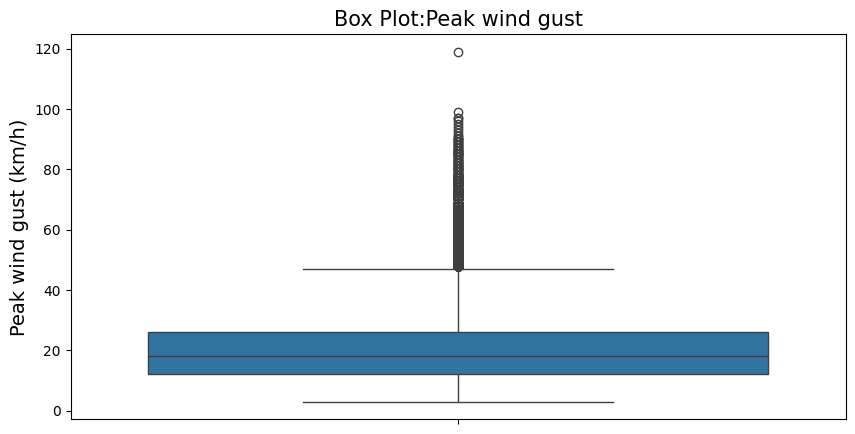

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

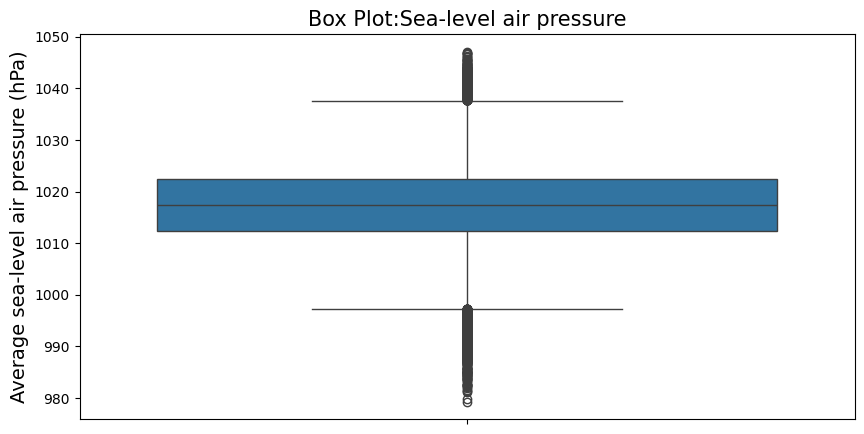

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

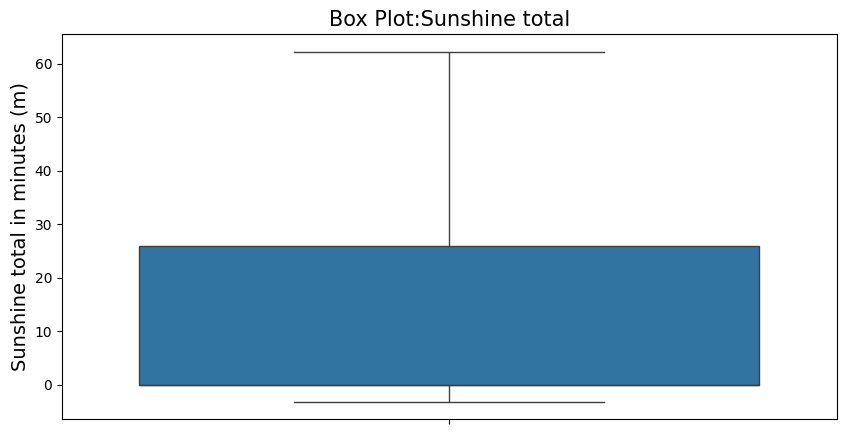

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

In [ ]:
Mun_df["tsun"].max()

62.24243344137838

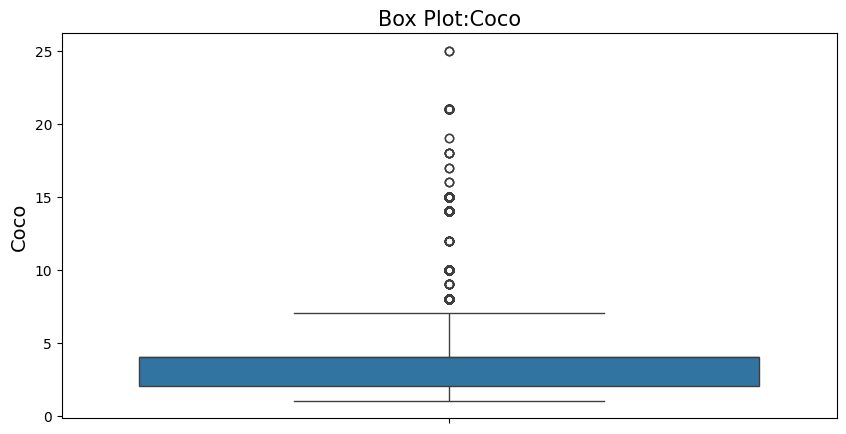

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_df.coco)
plt.title('Box Plot:Coco', fontsize=15)
plt.ylabel('Coco', fontsize=14)
plt.show()

In [ ]:
mask_ntsun = Mun_df['tsun'] > 0.0
Mun_df[mask_ntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
34,0.9,-1.5,84.0,0.0,290.0,26.3,45.0,1030.2,12.0,15.0
35,1.3,-1.9,79.0,0.0,300.0,25.2,45.0,1030.1,8.0,4.0
36,1.7,-2.1,76.0,0.0,300.0,23.4,43.0,1029.2,7.0,15.0
37,1.7,-2.6,73.0,0.0,290.0,22.3,42.0,1028.7,2.0,7.0
39,0.6,-3.0,77.0,0.1,310.0,24.8,49.0,1029.6,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...
43808,3.2,-2.3,67.0,0.0,140.0,11.5,20.0,1010.2,11.0,4.0
43809,4.1,-2.3,63.0,0.0,150.0,7.6,13.0,1010.4,1.0,4.0
43810,6.3,-2.3,54.0,0.0,150.0,8.6,17.0,1009.7,23.0,4.0
43814,9.8,-0.7,48.0,0.0,150.0,7.9,16.0,1005.9,4.0,4.0


In [ ]:
mask_tsun = Mun_df['tsun'] == 0.0
mask_prcp = Mun_df['prcp'] ==0.0
Mun_df[mask_tsun & mask_prcp]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,4.2,3.5,95.0,0.0,260.0,7.6,14.0,1034.0,0.0,5.0
1,4.2,3.3,94.0,0.0,250.0,6.8,13.0,1034.0,0.0,5.0
2,4.0,2.8,92.0,0.0,240.0,8.6,15.0,1034.2,0.0,4.0
3,3.9,2.6,91.0,0.0,240.0,10.4,20.0,1033.2,0.0,4.0
4,4.0,2.7,91.0,0.0,240.0,11.2,21.0,1032.2,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
43813,9.2,-1.3,48.0,0.0,140.0,7.2,14.0,1007.0,0.0,4.0
43816,8.0,1.6,64.0,0.0,310.0,14.8,30.0,1008.2,0.0,4.0
43821,4.2,1.9,85.0,0.0,210.0,11.2,27.0,1011.9,0.0,4.0
43822,4.3,1.7,83.0,0.0,200.0,10.1,21.0,1011.7,0.0,4.0


LOF ON WATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in Mun_df.columns:
# Reshape the data for LOF
 X = Mun_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Munchen weather {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Munchen weather temp: 0.27%
Percentage of outliers in Munchen weather dwpt: 0.15%
Percentage of outliers in Munchen weather rhum: 0.03%
Percentage of outliers in Munchen weather prcp: 0.03%
Percentage of outliers in Munchen weather wdir: 0.02%
Percentage of outliers in Munchen weather wspd: 0.11%
Percentage of outliers in Munchen weather wpgt: 0.26%
Percentage of outliers in Munchen weather pres: 0.66%
Percentage of outliers in Munchen weather tsun: 0.34%
Percentage of outliers in Munchen weather coco: 0.10%


USING NAIVE BAYES ON WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = Mun_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_Mun_df = Mun_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(Mun_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in Mun_df.columns:
    feature_anomalies_count = (anomalies_Mun_df[feature] != Mun_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")

Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.99%
dwpt: 9.90%
rhum: 9.69%
prcp: 3.28%
wdir: 8.73%
wspd: 9.81%
wpgt: 9.79%
pres: 9.96%
tsun: 3.84%
coco: 8.56%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in Mun_df.columns:
    # Extract the feature values
    X = Mun_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(Mun_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1573
  Percentage of anomalies: 3.59%
Feature: dwpt
  Number of anomalies detected: 1062
  Percentage of anomalies: 2.42%
Feature: rhum
  Number of anomalies detected: 2226
  Percentage of anomalies: 5.08%
Feature: prcp
  Number of anomalies detected: 1790
  Percentage of anomalies: 4.08%
Feature: wdir
  Number of anomalies detected: 560
  Percentage of anomalies: 1.28%
Feature: wspd
  Number of anomalies detected: 3014
  Percentage of anomalies: 6.88%
Feature: wpgt
  Number of anomalies detected: 2976
  Percentage of anomalies: 6.79%
Feature: pres
  Number of anomalies detected: 2784
  Percentage of anomalies: 6.35%
Feature: tsun
  Number of anomalies detected: 6186
  Percentage of anomalies: 14.12%
Feature: coco
  Number of anomalies detected: 1702
  Percentage of anomalies: 3.88%


AUTOENCODER ON WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_w = Mun_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_w = pd.DataFrame(index=Mun_df.index)

# Loop through each feature
for feature in features_auto_w :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_w  = scaler.fit_transform(Mun_df[[feature]])

    # Define the autoencoder model
    model_auto_w  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
    reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



In [ ]:

print(reconstruction_loss_auto_w)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

    # Identify anomalies
anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

for feature in features_auto_w:
    anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
    anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# Combine anomaly scores with original data for easier analysis
combined_data_auto_w = pd.concat([Mun_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_w.to_csv('Mun_df_with_anomaly_scores_auto_w.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_w.head()

Running XGboost on Weather Data

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(Mun_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.3086
Anomalies detected: 1799/43824 (4.11%)
----------------------------------------
Feature: dwpt
Threshold: 0.2933
Anomalies detected: 1696/43824 (3.87%)
----------------------------------------
Feature: rhum
Threshold: 2.5485
Anomalies detected: 2073/43824 (4.73%)
----------------------------------------
Feature: prcp
Threshold: 0.6312
Anomalies detected: 948/43824 (2.16%)
----------------------------------------
Feature: wdir
Threshold: 150.9946
Anomalies detected: 2061/43824 (4.70%)
----------------------------------------
Feature: wspd
Threshold: 2.4222
Anomalies detected: 1688/43824 (3.85%)
----------------------------------------
Feature: wpgt
Threshold: 5.2853
Anomalies detected: 1492/43824 (3.40%)
----------------------------------------
Feature: pres
Threshold: 13.3346
Anomalies detected: 2216/43824 (5.06%)
----------------------------------------
Feature: tsun
Threshold: 27.2870
Anomalies detected: 2659/43824 (6.07%)
------------------------------

IRRADIATION DATASET


In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=München"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    Mun_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
 Mun_irrad.head(20)

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546305300000,2019-01-01 01:15:00,2019-01-01T01:15:00.0/2019-01-01T01:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546306200000,2019-01-01 01:30:00,2019-01-01T01:30:00.0/2019-01-01T01:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546307100000,2019-01-01 01:45:00,2019-01-01T01:45:00.0/2019-01-01T02:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546308000000,2019-01-01 02:00:00,2019-01-01T02:00:00.0/2019-01-01T02:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München
1546308900000,2019-01-01 02:15:00,2019-01-01T02:15:00.0/2019-01-01T02:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,München


In [ ]:

# drop unwanted columns
Mun_clean_df =  Mun_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
Mun_irrad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                175296 non-null  object 
 1   Observation period  175296 non-null  object 
 2   TOA                 175296 non-null  object 
 3   Clear sky GHI       175296 non-null  object 
 4   Clear sky BHI       175296 non-null  object 
 5   Clear sky DHI       175296 non-null  object 
 6   Clear sky BNI       175296 non-null  object 
 7   GHI                 175296 non-null  float64
 8   BHI                 175296 non-null  object 
 9   DHI                 175296 non-null  object 
 10  BNI                 175296 non-null  object 
 11  Reliability         175296 non-null  object 
 12  cityName            175296 non-null  object 
dtypes: float64(1), object(12)
memory usage: 18.7+ MB


In [ ]:
#Get the percentage of null values in the dataset
Mun_clean_df.isnull().sum() /len(Mun_clean_df) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:
Mun_clean_df.head(20)

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546305300000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546306200000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546307100000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546308000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546308900000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = Mun_clean_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
Mun_clean_df

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
1704062700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704063600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704064500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704065400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
result = (Mun_clean_df['GHI'] == 0.0)

In [ ]:
Mun_clean_df[result]

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
1704062700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704063600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704064500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1704065400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
round((len(Mun_clean_df[result])/len(Mun_clean_df)) *100, 2)

48.85

In [ ]:
# results = (Mun_clean_df['GHI'] != 0.0) & (Mun_clean_df['TOA'] != 0.0) & (Mun_clean_df['DHI'] != 0.0) & (Mun_clean_df['BNI'] != 0.0) & \
#          (Mun_clean_df['BHI'] != 0.0) & (Mun_clean_df['Clear sky GHI'] != 0.0) & (Mun_clean_df['Clear sky DHI'] != 0.0) & \
#          (Mun_clean_df['Clear sky BNI'] != 0.0) & (Mun_clean_df['Clear sky BHI'] != 0.0)

# Mun_clean_df[results]

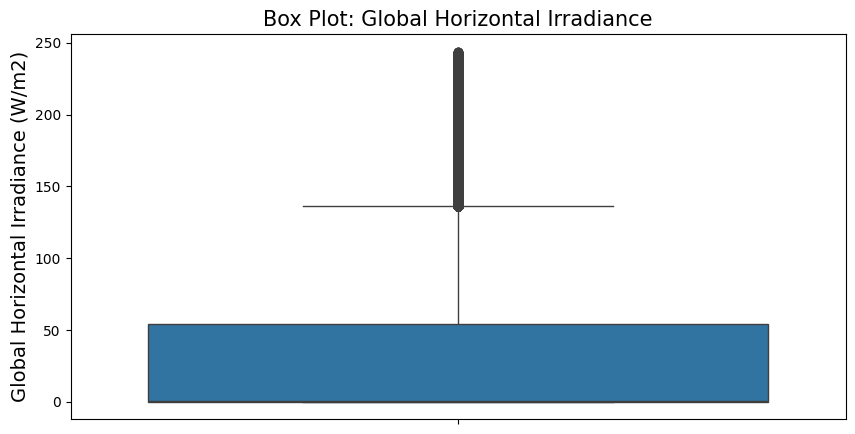

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_clean_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

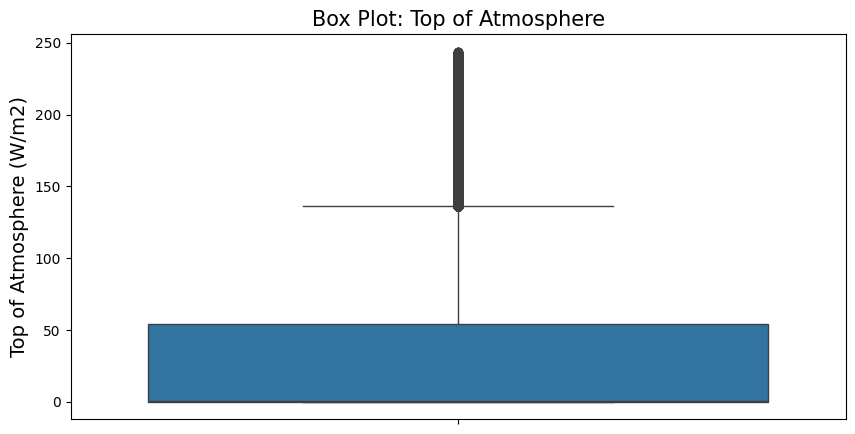

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(Mun_clean_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in Mun_clean_df.columns:
# Reshape the data for LOF
 X = Mun_clean_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in München irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in München irradiation in TOA: 0.04%
Percentage of outliers in München irradiation in Clear sky GHI: 0.01%
Percentage of outliers in München irradiation in Clear sky BHI: 0.06%
Percentage of outliers in München irradiation in Clear sky DHI: 0.02%
Percentage of outliers in München irradiation in Clear sky BNI: 0.01%
Percentage of outliers in München irradiation in GHI: 0.02%
Percentage of outliers in München irradiation in BHI: 0.12%
Percentage of outliers in München irradiation in DHI: 0.01%
Percentage of outliers in München irradiation in BNI: 0.05%


NAIVE BAYES FOR IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Assuming clean_Osna_Irrad is your DataFrame loaded from your dataset
# Example steps to handle data types and missing values

# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
Mun_clean_df = Mun_clean_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
Mun_clean_df = Mun_clean_df.dropna()  # Drop rows with NaN values

# Extract features
X = Mun_clean_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_Mun_clean_df = Mun_clean_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(Mun_clean_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in Mun_clean_df.columns:
    feature_anomalies_count = (anomalies_Mun_clean_df[feature] != Mun_clean_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.97%
DHI: 10.00%
BNI: 9.97%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in Mun_clean_df.columns:
    # Extract the feature values
    X = Mun_clean_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(Mun_clean_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: TOA
  Number of anomalies detected: 16080
  Percentage of anomalies: 9.17%
Feature: Clear sky GHI
  Number of anomalies detected: 16912
  Percentage of anomalies: 9.65%
Feature: Clear sky BHI
  Number of anomalies detected: 17105
  Percentage of anomalies: 9.76%
Feature: Clear sky DHI
  Number of anomalies detected: 13510
  Percentage of anomalies: 7.71%
Feature: Clear sky BNI
  Number of anomalies detected: 6560
  Percentage of anomalies: 3.74%
Feature: GHI
  Number of anomalies detected: 17118
  Percentage of anomalies: 9.77%
Feature: BHI
  Number of anomalies detected: 16458
  Percentage of anomalies: 9.39%
Feature: DHI
  Number of anomalies detected: 15311
  Percentage of anomalies: 8.73%
Feature: BNI
  Number of anomalies detected: 19817
  Percentage of anomalies: 11.30%


AUTOENCODER ON IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_i = Mun_clean_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_i = pd.DataFrame(index=Mun_clean_df.index)

# Loop through each feature
for feature in features_auto_i :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_i  = scaler.fit_transform(Mun_clean_df[[feature]])

    # Define the autoencoder model
    model_auto_i  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
    reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



5478/5478 [==============================] - 8s 1ms/step


In [ ]:

print(reconstruction_loss_auto_i)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

    # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# Combine anomaly scores with original data for easier analysis
combined_data_auto_i = pd.concat([Mun_clean_df, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_i.to_csv('Mun_clean_df_with_anomaly_scores_auto_i.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_i.head()






[5.4839236e-08 5.4839236e-08 5.4839236e-08 ... 5.4839236e-08 5.4839236e-08
 5.4839236e-08]
Feature: TOA, Anomaly Percentage: 10.02%
Feature: Clear sky GHI, Anomaly Percentage: 8.12%
Feature: Clear sky BHI, Anomaly Percentage: 37.02%
Feature: Clear sky DHI, Anomaly Percentage: 32.92%
Feature: Clear sky BNI, Anomaly Percentage: 21.75%
Feature: GHI, Anomaly Percentage: 26.70%
Feature: BHI, Anomaly Percentage: 1.19%
Feature: DHI, Anomaly Percentage: 11.26%
Feature: BNI, Anomaly Percentage: 10.00%


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,TOA_anomaly_score,Clear sky GHI_anomaly_score,Clear sky BHI_anomaly_score,Clear sky DHI_anomaly_score,Clear sky BNI_anomaly_score,GHI_anomaly_score,BHI_anomaly_score,DHI_anomaly_score,BNI_anomaly_score
1546300800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.937225e-08,5.286559e-09,1.579674e-08,3.057025e-09,1.674475e-08,1.249414e-08,1.482639e-08,6.425770e-09,5.483924e-08
1546301700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.937225e-08,5.286559e-09,1.579674e-08,3.057025e-09,1.674475e-08,1.249414e-08,1.482639e-08,6.425770e-09,5.483924e-08
1546302600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.937225e-08,5.286559e-09,1.579674e-08,3.057025e-09,1.674475e-08,1.249414e-08,1.482639e-08,6.425770e-09,5.483924e-08
1546303500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.937225e-08,5.286559e-09,1.579674e-08,3.057025e-09,1.674475e-08,1.249414e-08,1.482639e-08,6.425770e-09,5.483924e-08
1546304400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.937225e-08,5.286559e-09,1.579674e-08,3.057025e-09,1.674475e-08,1.249414e-08,1.482639e-08,6.425770e-09,5.483924e-08


In [ ]:
mn_df = Mun_clean_df.select_dtypes(include=['object']).astype('float')
mn_df['GHI'] = Mun_clean_df['GHI']
mn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   GHI     175296 non-null  float64
dtypes: float64(1)
memory usage: 2.7+ MB


XG BOOST

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(mn_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


XGBoostError: [04:11:17] /workspace/src/data/iterative_dmatrix.cc:202: Check failed: n_features >= 1 (0 vs. 1) : Data must has at least 1 column.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x78d9c41c1fba]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f59b7) [0x78d9c41c79b7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x78d9c41ca858]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x78d9c4174a07]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x78d9c3f37c40]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x78da34290e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x78da3428d493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x78da342b63e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x78da342b5a00]

